### 2D Data

The outcome of an experiment can also be characterized by two continuous random variables x and y. We can use different methods to visualize these random variables.

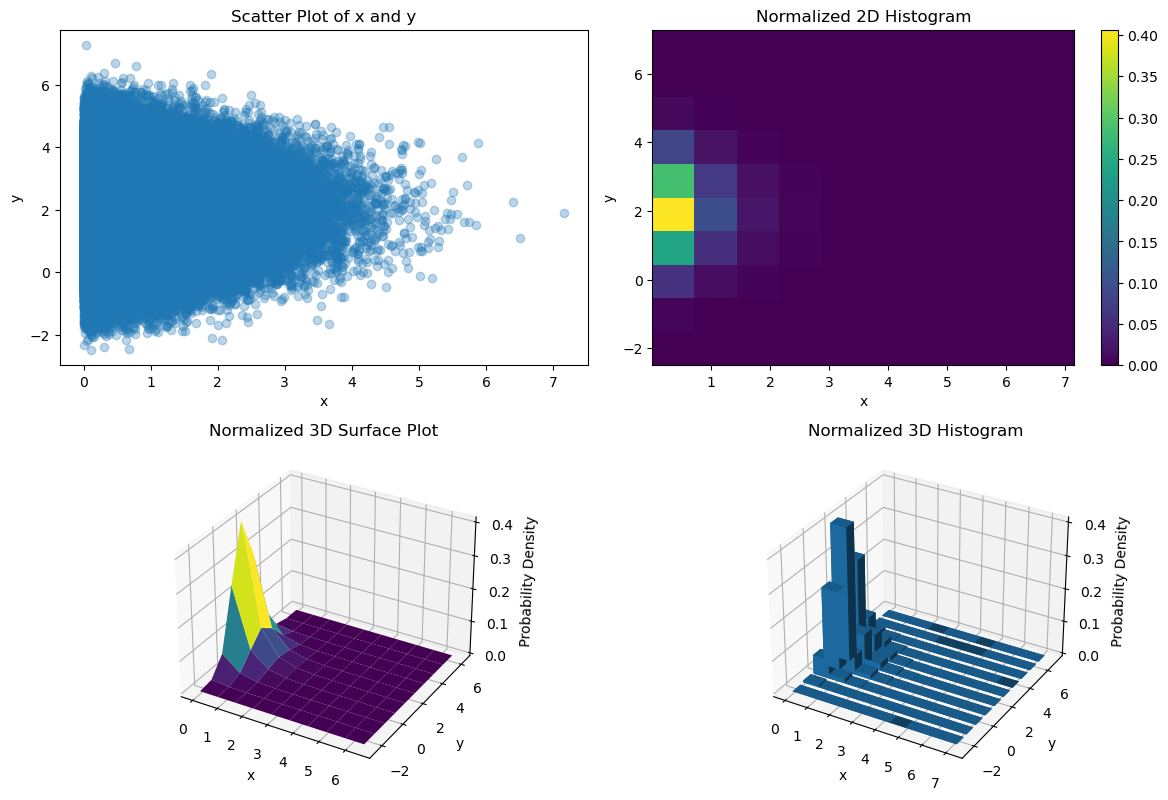

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create data
x = np.random.exponential(0.5, 1000000)  # tau=2 (mean lifetime)
y = np.random.normal(2, 1, 1000000)      # mean=2, std=1

# scatter plot and histograms
fig = plt.figure(figsize=(12, 8))

# scatter plot
ax1 = fig.add_subplot(221)
ax1.scatter(x, y, alpha=0.3)
ax1.set_title("Scatter Plot of x and y")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

# histogram 2d
ax2 = fig.add_subplot(222)
h, xedges, yedges, img = ax2.hist2d(x, y, bins=10, density=True, cmap='viridis')
plt.colorbar(img, ax=ax2)
ax2.set_title("Normalized 2D Histogram")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

# surface plot
ax3 = fig.add_subplot(223, projection='3d')
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
ax3.plot_surface(xpos, ypos, h, cmap='viridis')
ax3.set_title("Normalized 3D Surface Plot")
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("Probability Density")

# histogram 3d (3d bar plot)
xpos, ypos, zpos = xpos.ravel(), ypos.ravel(), 0
dx = dy = (xedges[1] - xedges[0])
dz = h.ravel()  
ax4 = fig.add_subplot(224, projection='3d')
ax4.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True, cmap='viridis')
ax4.set_title("Normalized 3D Histogram")
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_zlabel("Probability Density")

plt.tight_layout()
plt.show()


### Joint PDF

The probability for a point to be observed in the square given by the intersection of the two bands (the event A and B) is given by the joint PDF times the area element.

$$P(A \cup B)= f(x,y)dxdy$$

Here, joint PDF, $f(x,y)$, is the density of points on a scatter plot of x and y in the limit of infinitely many points. So, three normalized plots above illustrate joint PDF of x and y in different ways.

We can visualize what $P(A \cup B)$ means on the same scatter plot. Let's say, $P(A)$ is the probability of x to be in [1.0, 1.0+dx], and $P(B)$ is the probability of y to be in [3.0, 3.0+dy]. Then, $P(A \cup B)$ would be the probability density of the rectangle that is the intersection of the two bands times $dxdy$.

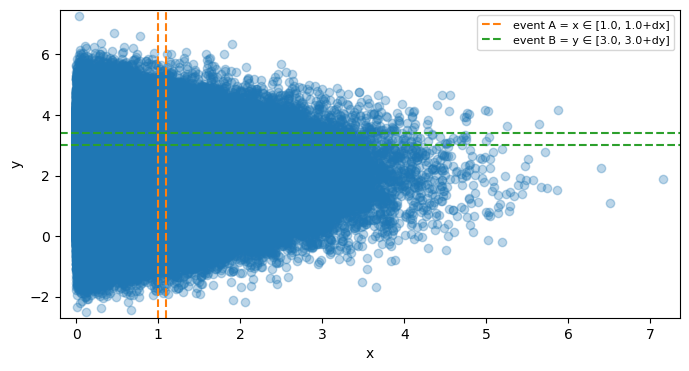

In [2]:
xlim = [min(x)-0.2, max(x)+0.2]
ylim = [min(y)-0.2, max(y)+0.2]
plt.figure(figsize=(8, 4))
plt.scatter(x, y, alpha=0.3, color='#1f77b4')
plt.plot([1.0, 1.0], ylim, color='#ff7f0e', linestyle='--', label='event A = x ∈ [1.0, 1.0+dx]')
plt.plot([1.1, 1.1], ylim, color='#ff7f0e', linestyle='--')
plt.plot(xlim, [3.0, 3.0], color='#2ca02c', linestyle='--', label='event B = y ∈ [3.0, 3.0+dy]')
plt.plot(xlim, [3.4, 3.4], color='#2ca02c', linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_xlim(xlim)
plt.gca().set_ylim(ylim)
plt.legend(fontsize=8)
plt.show()

### Marginal PDF

It is the projection of the scatter plot of x vs y onto respective axis.

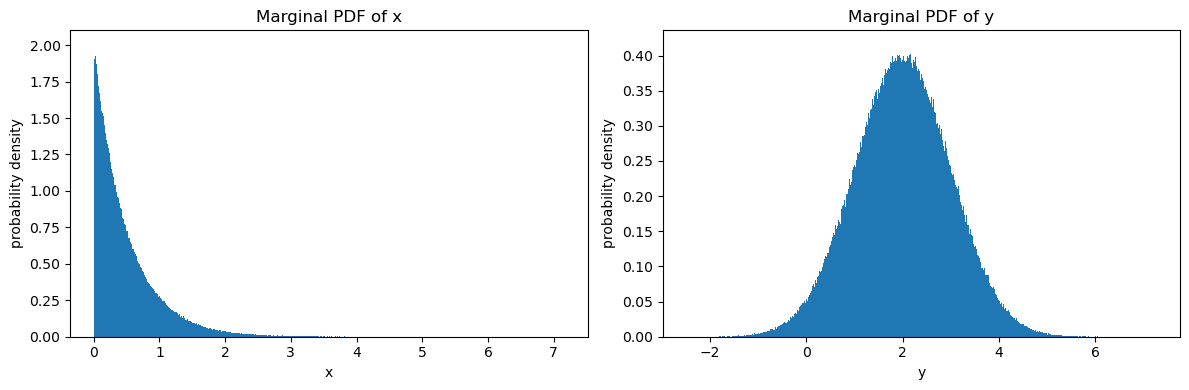

In [3]:
fig,ax = plt.subplots(1, 2, tight_layout=True, figsize=(12, 4))
ax[0].hist(x, bins=1000, density=True)
ax[0].set_title("Marginal PDF of x")
ax[0].set_xlabel("x")
ax[0].set_ylabel("probability density")
ax[1].hist(y, bins=1000, density=True)
ax[1].set_title("Marginal PDF of y")
ax[1].set_xlabel("y")
ax[1].set_ylabel("probability density")
plt.show()

### Conditional PDF

It corresponds to a slice plot of the scatter plot.

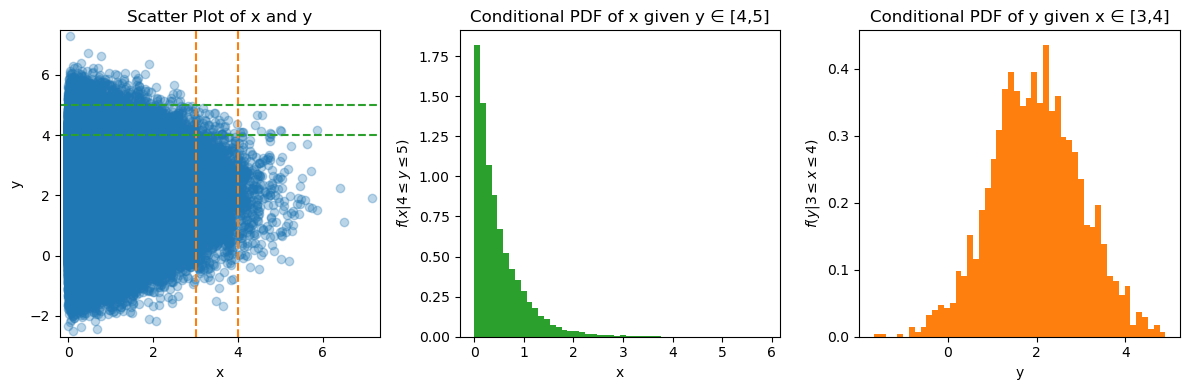

In [4]:
fig,ax = plt.subplots(1, 3, tight_layout=True, figsize=(12, 4))
ax[0].scatter(x, y, alpha=0.3, color='#1f77b4')
ax[0].plot([3.0, 3.0], ylim, color='#ff7f0e', linestyle='--')
ax[0].plot([4.0, 4.0], ylim, color='#ff7f0e', linestyle='--')
ax[0].plot(xlim, [4.0, 4.0], color='#2ca02c', linestyle='--')
ax[0].plot(xlim, [5.0, 5.0], color='#2ca02c', linestyle='--')
ax[0].set_title("Scatter Plot of x and y")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)

ax[1].hist(x[(y>4)&(y<5)], bins=50, density=True, color='#2ca02c')
ax[1].set_title("Conditional PDF of x given y ∈ [4,5]")
ax[1].set_xlabel("x")
ax[1].set_ylabel("$f(x|4\\leq y \\leq 5)$")

ax[2].hist(y[(x>3)&(x<4)], bins=50, density=True, color='#ff7f0e')
ax[2].set_title("Conditional PDF of y given x ∈ [3,4]")
ax[2].set_xlabel("y")
ax[2].set_ylabel("$f(y|3\\leq x \\leq 4)$")
plt.show()

References

[1] Dominic Hirschbühl, Advanced Data Analysis Lecture Notes \
[2] Glen Cowan, Statistical Data Analysis, Oxford University Press